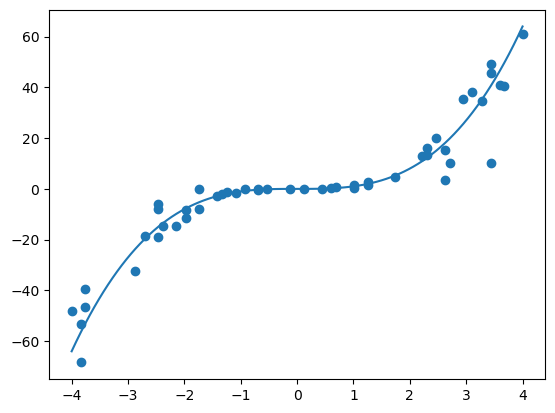

In [34]:
from matplotlib import pyplot as plt
import numpy as np

def f(x:np.ndarray) -> np.ndarray:
    return np.power(x, 3)

x = np.linspace(-4,4,100)
y = f(x)
x_hat = np.random.choice(x, 50)
eps = np.random.normal(0, 0.5, 50)
y_hat = f(x_hat) + f(x_hat) * eps
plt.plot(x,y)
plt.scatter(x_hat,y_hat)
plt.show()


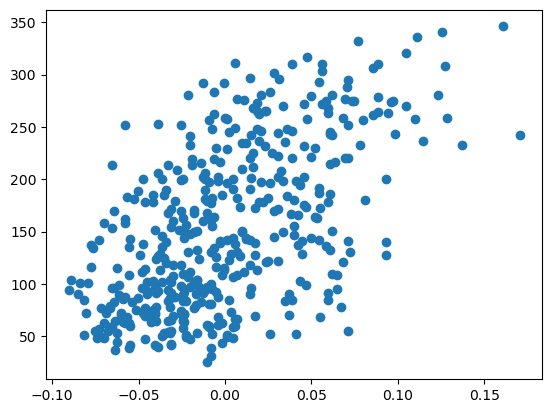

In [12]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
# diabetes
plt.plot(diabetes.data[:,2], diabetes.target, 'o')

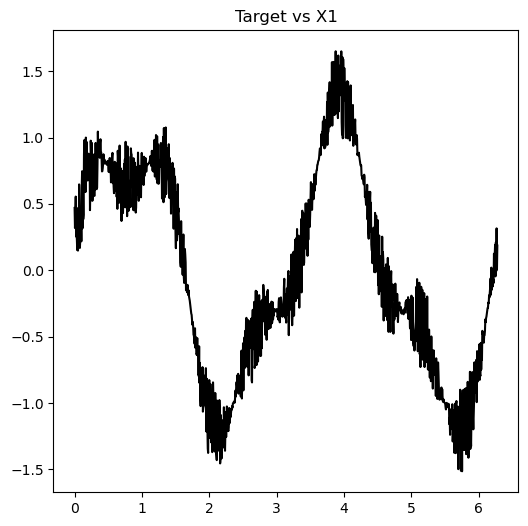

In [157]:
# https://www.kaggle.com/code/dipuk0506/toy-dataset-for-regression-and-uq#Dataset2:
import math

N_train = 1128

Noise_Mag = .7
figure_size = (6, 6)

N = N_train
X1 = np.arange(0, 2*math.pi, 2*math.pi/N) # Range = 0 to 2*pi
X2 = np.arange(0, 5*math.pi, 5*math.pi/N) # Range = 0 to 2*pi
y = np.sin(2*X1)+ Noise_Mag*(np.random.rand(N))*np.sin(2*X2 + math.pi/4)
# y = np.sin(2*X1)+ Noise_Mag*np.sin(2*X2 + math.pi/4)
# y = np.sin(2*X1) + Noise_Mag*np.sin(2*X2) + np.random.normal(0, 0.05, N)

plt.figure(figsize=figure_size) 
plt.title('Target vs X1')
# plt.scatter(X1, y, color='k',s=.2)
plt.plot(X1, y, color='k')
plt.show()

In [156]:
(np.pi / 4) * 180 / np.pi

45.0

In [200]:
from abc import ABC, abstractmethod
from torch.utils.data import Dataset

class SyntheticDataset(Dataset, ABC):
    def __init__(self, n_samples:int, noise:float = .6) -> None:
        '''
            Parameters:
            -----------
                n_samples: int
                    Number of samples to generate
                
                noise: float
                    Noise magnitude
        '''
        super(SyntheticDataset, self).__init__()
        self.n_samples = n_samples
        self.noise = noise
        self.X, self.y = None, None

    @abstractmethod
    def generate_dataset(self) -> None:
        pass
    

class SyntheticDataset1(SyntheticDataset):
    '''
        Sinousoidal dataset with two frequencies. 

        La segunda variable determina la dirección y la magnitud de la incertidumbre
    ''' 
    def __init__(self, n_samples:int, noise:float = .6) -> None:
        super(SyntheticDataset1, self).__init__(n_samples, noise)
        self.generate_dataset()

    def generate_dataset(self) -> None:
        self.X = np.arange(0, 2*np.pi, 2*np.pi/self.n_samples)    

        # Determines direction and magnitude of Uncertainty
        noise_signal = np.arange(0, 5*np.pi, 5*np.pi/self.n_samples)
        epsilon = np.random.rand(self.n_samples)

        print(self.X.shape, noise_signal.shape, epsilon.shape)
        self.y = np.sin(2*self.X) + (np.sin(2*noise_signal + np.pi/4) * (self.noise*epsilon))

(2000,) (2000,) (2000,)


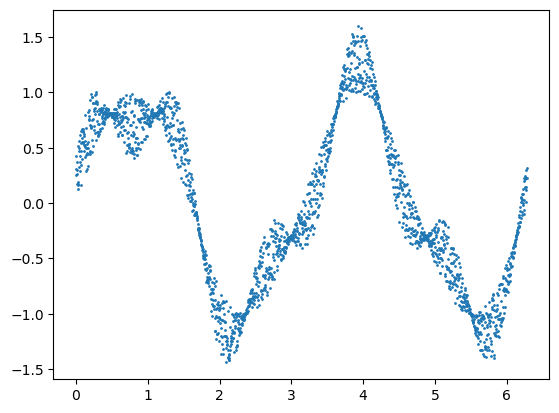

In [205]:
dataset = SyntheticDataset1(2000)

plt.scatter(dataset.X, dataset.y, s=1)
plt.show()

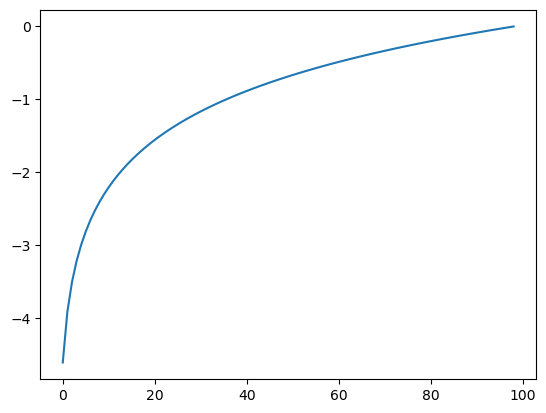

In [212]:
plt.plot(np.log(np.arange(0.01, 1, 1/100)))